In [3]:
from scipy.interpolate import griddata
from PIL import Image
matplotlib.rcParams['figure.figsize'] = (20, 12)

In [4]:
capitol_png = Image.open("USCapitol.png").convert('L')    # Load in the image in grayscale
capitol = np.array(capitol_png)    # Save to a NumPy array, with intensity stored in the array and coordinates of the
                                   # array's entries serving as the pixels' coordinates
capitol.shape

(1067, 1600)

In [5]:
capitol[:5, :5]

array([[138, 138, 139, 139, 139],
       [139, 139, 139, 139, 139],
       [139, 139, 139, 139, 139],
       [139, 139, 139, 139, 140],
       [140, 140, 140, 140, 140]], dtype=uint8)

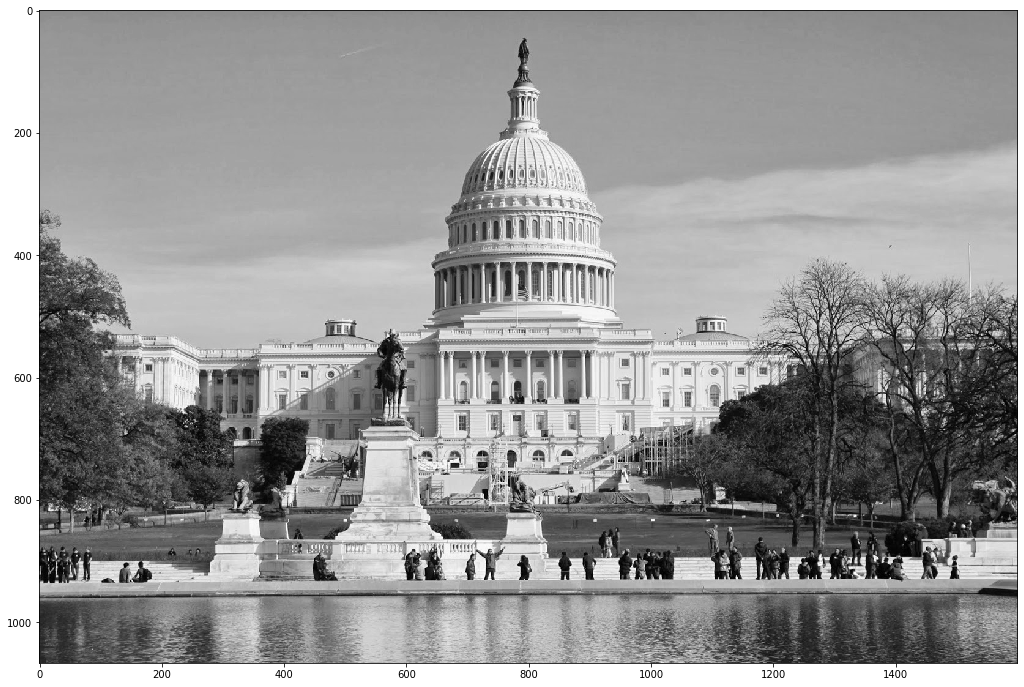

In [6]:
plt.imshow(capitol, cmap="gray")    # A grayscale display of the image; see the aliasing?

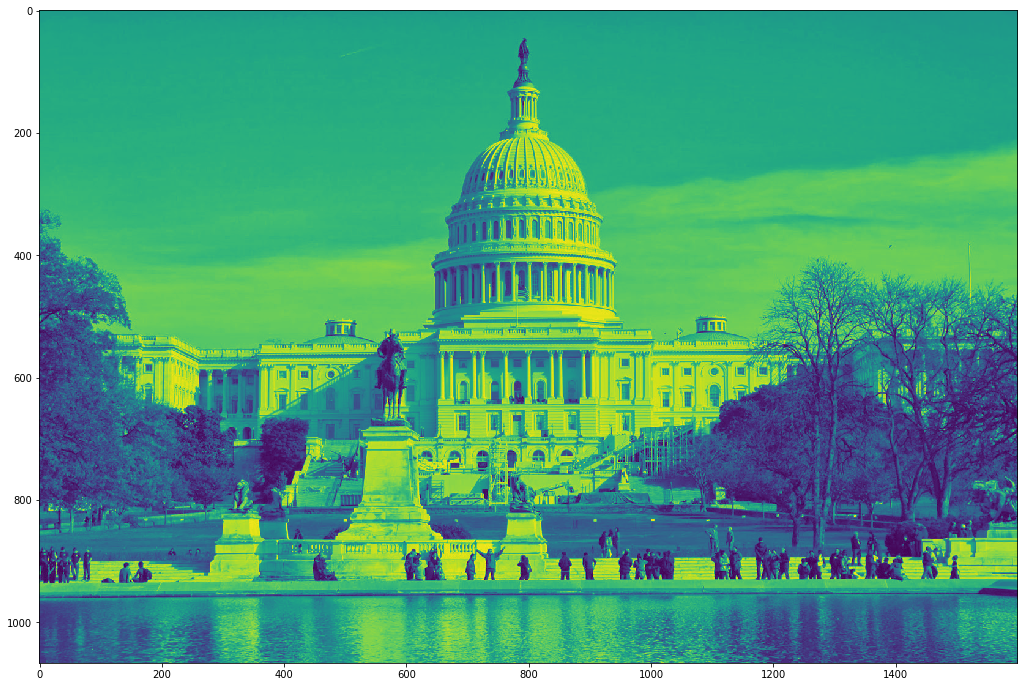

In [7]:
plt.imshow(capitol)    # Different color mappings may be more informative

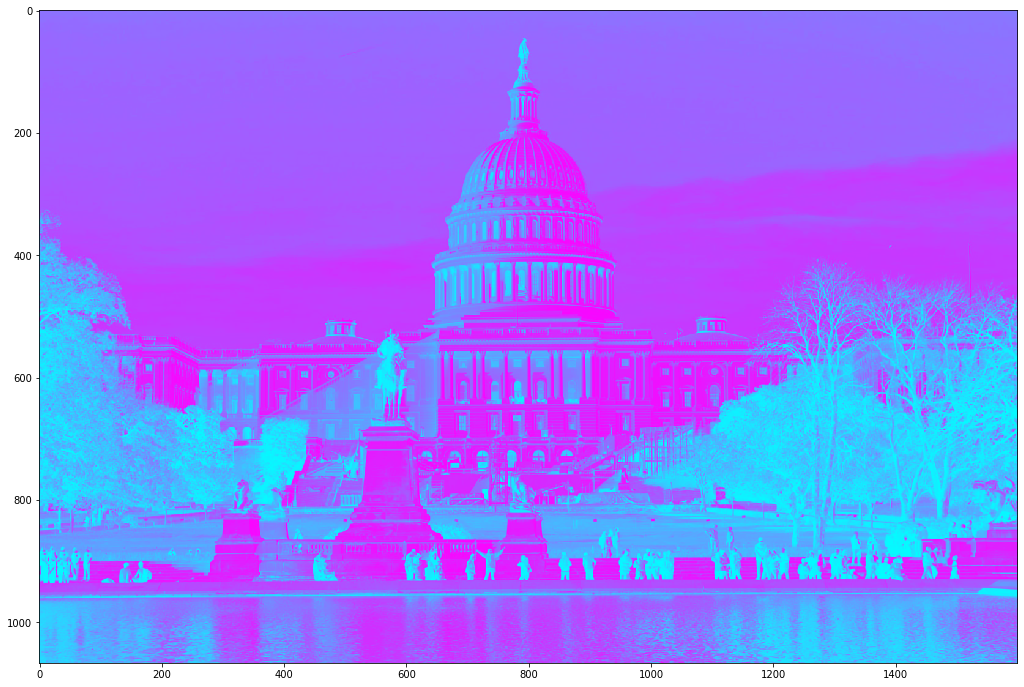

In [9]:
plt.imshow(capitol, cmap="cool")    # Aliasing is even more obvious

In [10]:
def griddata_point_format(arr, normalize=True):
    """Converts grayscale image stored in ndarray arr into a format acceptable for griddata, returning a dict
       If normalize is True, coordinates are on a 0-1 scale"""
    
    shape = arr.shape
    x = np.arange(shape[0])
    y = np.arange(shape[1])
    coord_mat = np.transpose([np.tile(x, shape[1]), np.repeat(y, shape[0])])    # Construct a matrix of coordinates
    values = arr[coord_mat[:, 0], coord_mat[:, 1]]    # Construct a 1D array containing the intensity values of the image
                                                      # at the given coordinates
    if normalize:
        # All coordinates will be between 0 and 1
        coord_mat = np.array(coord_mat, dtype=np.float64)
        coord_mat[:, 0] = coord_mat[:, 0] / shape[0]    # Note that 1 is not actually attained; that's fine
        coord_mat[:, 1] = coord_mat[:, 1] / shape[1]
        
    return {"points": coord_mat, "values": values}

def interp_points(length, width, normalize=True):
    """Gets two NumPy arrays corresponding to the points where interpolation should occur"""
    
    grid_x, grid_y = np.mgrid[0:length, 0:width]
    if normalize:
        # This option should be used if normalize is True in griddata_point_format
        # All points will be between 0 and 1
        grid_x = np.array(grid_x, dtype=np.float64)
        grid_y = np.array(grid_y, dtype=np.float64)
        grid_x = grid_x / length
        grid_y = grid_y / width
    
    return (grid_x, grid_y)

test = griddata_point_format(capitol)
test["values"][:5]    # intensities of the first five pixels (bright)

array([138, 139, 139, 139, 140], dtype=uint8)

In [11]:
test["values"][-5:]    # Intensities for last five (dark)

array([ 86,  72, 119,  97,  86], dtype=uint8)

In [12]:
test["points"][:5, :]    # Location of the first five pixels after normalization (top-left)

array([[0.        , 0.        ],
       [0.00093721, 0.        ],
       [0.00187441, 0.        ],
       [0.00281162, 0.        ],
       [0.00374883, 0.        ]])

In [13]:
test["points"][-5:, :]    # Location of the last five pixels (bottom-right)

array([[0.99531396, 0.999375  ],
       [0.99625117, 0.999375  ],
       [0.99718838, 0.999375  ],
       [0.99812559, 0.999375  ],
       [0.99906279, 0.999375  ]])

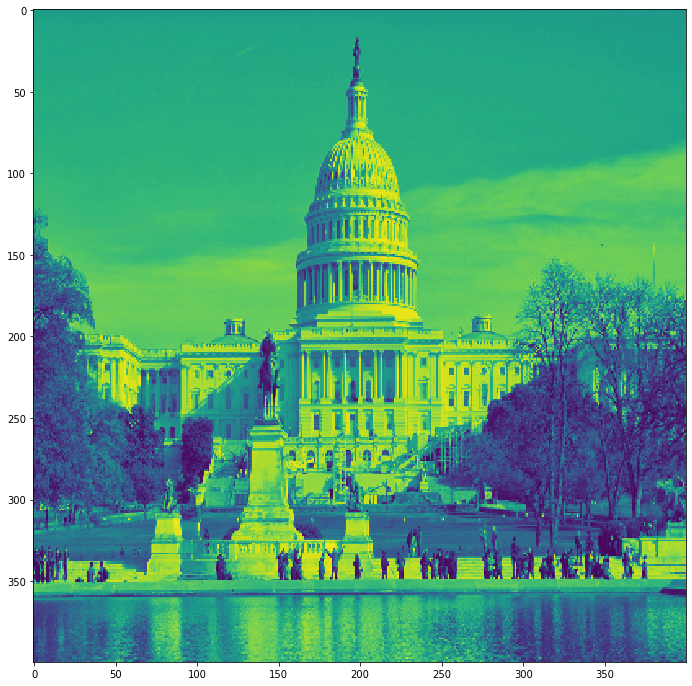

In [14]:
im0 = griddata(xi = interp_points(400, 400), **griddata_point_format(capitol))    # Resize to a 400x400 image
plt.imshow(im0)

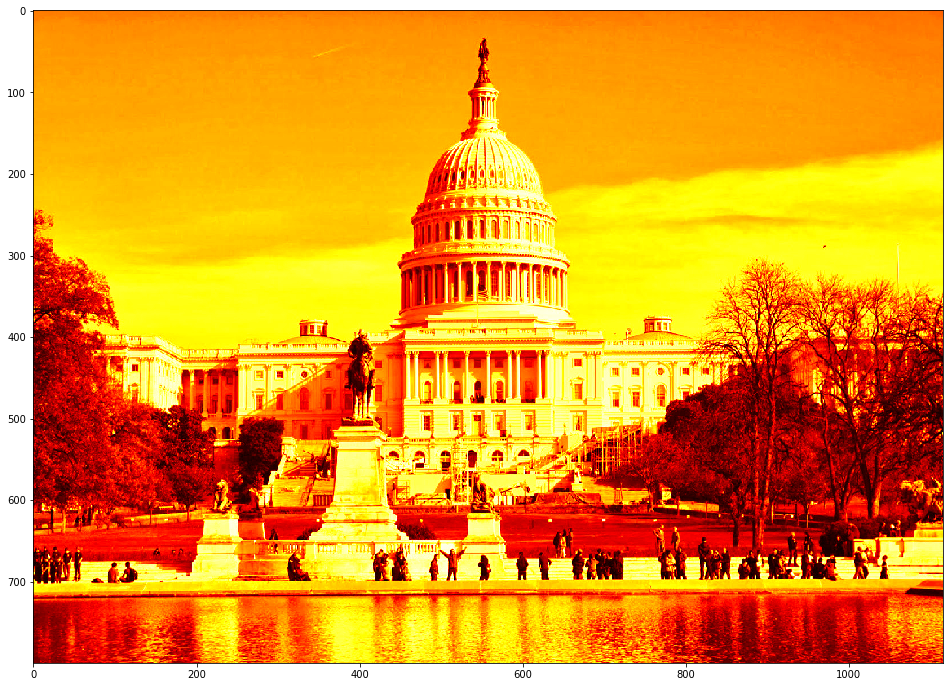

In [15]:
im1 = griddata(xi = interp_points(800, 4 * 279), method="nearest", **griddata_point_format(capitol))    # Quadruple size
plt.imshow(im1, cmap="hot")    # Obvious artifacts due to "nearest" method

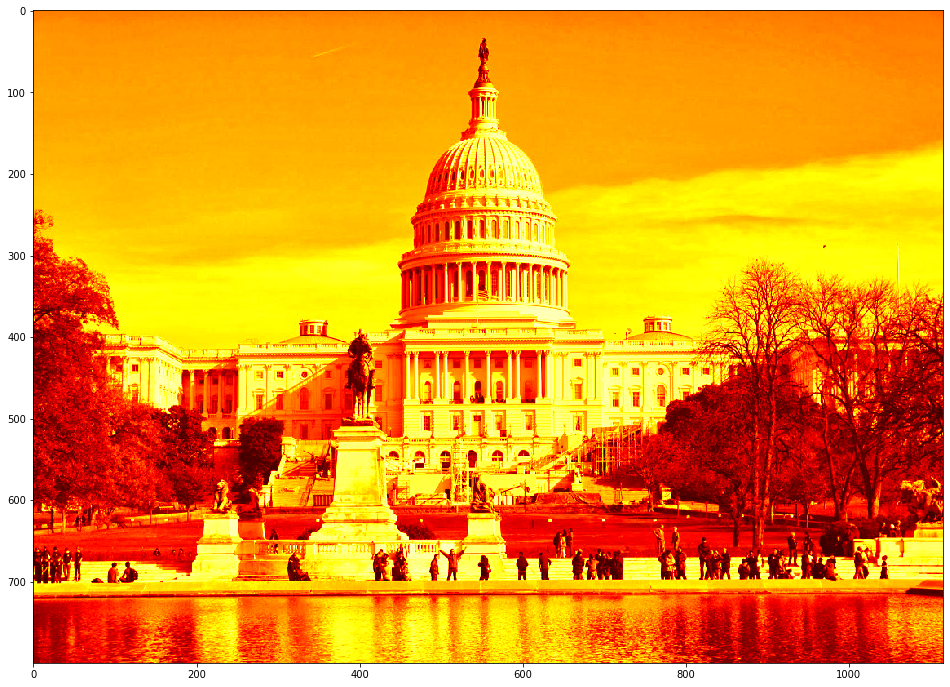

In [16]:
im1 = griddata(xi = interp_points(800, 4 * 279), method="cubic", **griddata_point_format(capitol))
plt.imshow(im1, cmap="hot")    # Arguably the best resizing